In [8]:
#RNN의 순방향 패스

#은닉층 노드 4개
#다음 단어 맞추기

inputs = np.random.random([32, 10, 8]).astype(np.float32)

simple_rnn = tf.keras.layers.SimpleRNN(4) # 4개의 셀 #8차원
output = simple_rnn(inputs) # output은 최종 은닉 상태로 `[32, 4]` 형상이다.

#batch, timesteps, feature
#피드-포워드 신경망, 순환 신경망

In [9]:
simple_rnn = tf.keras.layers.SimpleRNN(
	4, return_sequences=True, return_state=True)

whole_sequence_output, final_state = simple_rnn(inputs)

# whole_sequence_output의 형상은 `[32, 10, 4]`.
# final_state의 형상은 `[32, 4]`.

In [10]:
#역전파(BPTT, Backpropagation Through Time): 모든 에러 업데이트, gradient descent
#그래디언트 폭증, 소실(w prime `=`w`-` alpha * { sigma E } over { sigma W })
#{delta E} over {delta W} 값
#1보다 작은 값: 소실, 큰 값: 폭증

#그래디언트 소실 문제 → 활성화 함수를 ReLU로 바꿈, LSTM / GPU 사용
#그래디언트 폭증 문제 → max 값 설정

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

def make_sample(data, window):
    train = []					# 공백 리스트 생성
    target = []
    for i in range(len(data)-window):		# 데이터의 길이만큼 반복
        train.append(data[i:i+window])		# i부터 (i+window-1) 까지를 저장
        target.append(data[i+window])		# (i+window) 번째 요소는 정답
    return np.array(train), np.array(target)	# 파이썬 리스트를 넘파이로 변환

seq_data = []
for i in np.arange(0, 1000):
    seq_data += [[np.sin( np.pi * i* 0.01 )]] #사인 함수
X, y = make_sample(seq_data, 10)		# 윈도우 크기=10

Epoch 1/100
31/31 [==============================] - 1s 3ms/step - loss: 0.0694
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 13/100
31/31 [=================

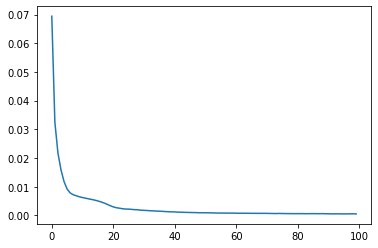

In [11]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10,1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, y, epochs=100, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.show()

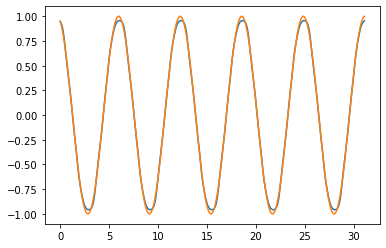

In [13]:
seq_data = []
for i in np.arange(0, 1000):			# 테스트 샘플 생성
    seq_data += [[np.cos( np.pi * i* 0.01 )]]
X, y = make_sample(seq_data, 10)		# 윈도우 크기=10

y_pred = model.predict(X, verbose=0)		# 테스트 예측값
plt.plot(np.pi * np.arange(0, 990)*0.01, y_pred )
plt.plot(np.pi * np.arange(0, 990)*0.01, y)
plt.show()

In [14]:
#LSTM 신경망: 그래디언트 소실 현상 방지, 장기 의존성
#simple RNN

#게이트(sigmoid): 입력 게이트, 출력 게이트, 삭제 게이트

#새로운 정보 저장(tan h)
#시그모이드 함수 → 0~1

#셀 상태 값
#출력 연산

In [15]:
inputs = tf.random.normal([32, 10, 8])

lstm = tf.keras.layers.LSTM(4) # 4개의 셀을 가진다.
output = lstm(inputs)

print(output.shape)
print(output)

(32, 4)
tf.Tensor(
[[ 1.32350951e-01 -1.72570527e-01  3.57704994e-04 -5.99888451e-02]
 [ 1.25378847e-01  3.82534742e-01  1.21114746e-01  4.41105701e-02]
 [ 4.73857932e-02  1.15822861e-02  2.90765837e-02 -2.00386625e-03]
 [ 2.98203796e-01 -8.57131779e-02  1.50554419e-01  2.66130060e-01]
 [ 5.23610651e-01  1.91138573e-02  3.64750713e-01  2.29574278e-01]
 [ 3.75055969e-02 -9.33945086e-03  2.34314919e-01  2.28845283e-01]
 [ 1.03456780e-01 -3.24541554e-02  2.01964118e-02  3.40314180e-01]
 [ 1.66807309e-01 -6.26031682e-03  7.74843693e-02  3.01457882e-01]
 [ 1.66223831e-02  1.11145429e-01 -1.92019541e-03 -1.31576046e-01]
 [ 7.47633129e-02 -3.42933387e-02 -1.60214037e-01 -1.30220190e-01]
 [ 9.28518847e-02  1.70891434e-01  2.84238726e-01 -4.71494943e-02]
 [-3.57651621e-01 -2.16191113e-01  1.05783455e-02  2.24030986e-02]
 [-2.39200085e-01 -2.68426448e-01  4.48132828e-02 -2.80639142e-01]
 [ 3.15412968e-01 -5.03320731e-02  1.29948199e-01 -3.11725698e-02]
 [-2.24516124e-01  3.07008922e-01 -3.892800

In [16]:
#GRU: 2014년에 제안된 순환 신경망 모델

In [17]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

samsung = fdr.DataReader('005930', '2016')
print(samsung)

openValues = samsung[['Open']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues)

TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

             Open   High    Low  Close    Volume    Change
Date                                                      
2016-01-04  25200  25200  24100  24100    306939 -0.043651
2016-01-05  24040  24360  23720  24160    216002  0.002490
2016-01-06  24160  24160  23360  23500    366752 -0.027318
2016-01-07  23320  23660  23020  23260    282388 -0.010213
2016-01-08  23260  23720  23260  23420    257763  0.006879
...           ...    ...    ...    ...       ...       ...
2022-06-09  65100  65200  64500  65200  25790725 -0.001531
2022-06-10  64000  64400  63800  63800  22193552 -0.021472
2022-06-13  62400  62800  62100  62100  22157816 -0.026646
2022-06-14  61200  62200  61100  61900  24606419 -0.003221
2022-06-15  61300  61500  60200  60700  26542979 -0.019386

[1585 rows x 6 columns]


In [18]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
                input_shape=(X_train.shape[1], 1), 
                activation='tanh', 
                return_sequences=False)
          )
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
85/85 [==============================] - 3s 10ms/step - loss: 0.0493
Epoch 2/100
85/85 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 3/100
85/85 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 4/100
85/85 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 5/100
85/85 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 6/100
85/85 [==============================] - 1s 11ms/step - loss: 0.0012
Epoch 7/100
85/85 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 8/100
85/85 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 9/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 10/100
85/85 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 11/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 12/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 13/100
85/85 [=====

6/6 [==============================] - 1s 6ms/step


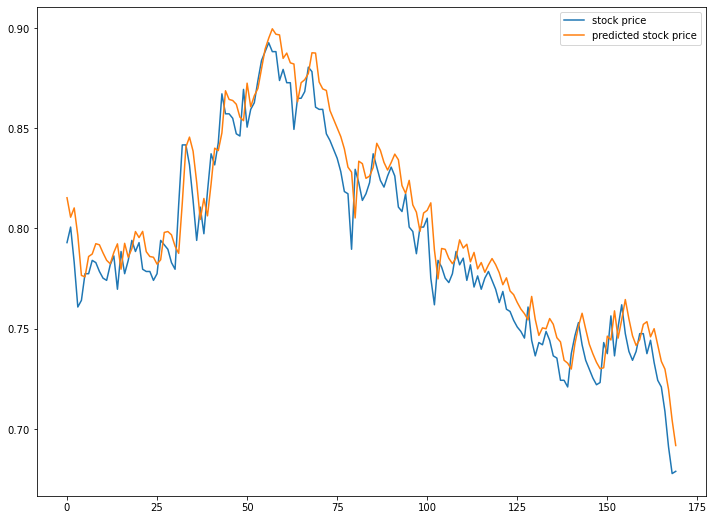

In [20]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()

In [ ]:
#RNN: 시계열, 자연어 데이터 모델링
#BPTT
#SimpleRNN, GRU, LSTM